# Time Series Fundamentals

## 1. What is a Time Series?
A **time series** is a sequence of data points collected, recorded, or observed **over time at regular intervals** (e.g., seconds, minutes, days, months, or years).  

It is used to identify patterns, trends, and cycles within data to help with forecasting future events. 

Unlike regular datasets where the order of observations may not matter, **the order of time series data is critical** because each observation is dependent on time.

### Examples
- Daily stock market prices of Bitcoin (2014–present)
- Monthly sales revenue of a retail store
- Hourly temperature readings of a weather station
- Yearly population growth in a city

### Key Characteristics of Time Series Data
- **Chronological Order**: Data points are ordered by time, with each observation being dependent on those that came before it. 
- **Temporal Dependencies**: Unlike traditional datasets, time series data points are not independent; the value of one point can influence the next. 
- **Time Intervals**: Data is collected at specific intervals, which can be regular (e.g., daily, hourly) or irregular. 

## 2. Components of a Time Series
A time series is made up of four main components that describe its patterns:

1. **Trend (T)**  
   - The long-term direction of the data (upward, downward, or flat).  
   - Shows overall growth or decline.  
   - Example: steady increase in global temperatures.

2. **Seasonality (S)**  
   - Regular, repeating patterns at fixed intervals (daily, monthly, yearly).  
   - Caused by seasons, holidays, or human behavior.  
   - Example: higher ice cream sales every summer.

3. **Cyclic (C)**  
   - Long-term fluctuations around the trend with no fixed period.  
   - Linked to economic or business cycles.  
   - Example: multi-year economic booms and recessions.

4. **Irregular/Random (R)**  
   - Unpredictable variations caused by unexpected events (noise).  
   - Example: sudden sales drop from a natural disaster. 

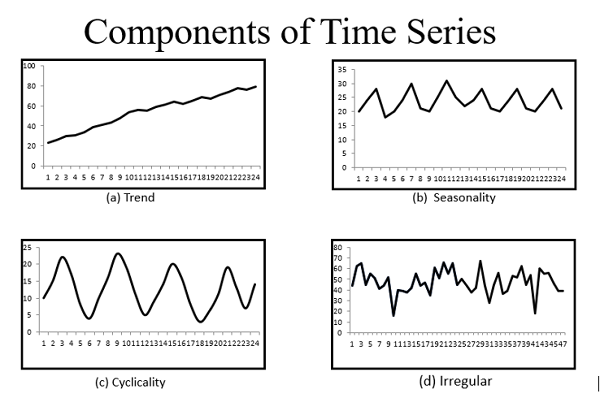


### Time Series Analysis
This is the process of analyzing time-ordered data to extract meaningful insights and patterns. The goal of time series analysis is to: 
1. **Build a Model**: Create a model that represents the underlying patterns (trends, cycles, seasonality) within the data. 
2. **Forecast Future Values**: Use the model to predict future outcomes, such as sales figures or resource needs. 
3. **Understand Behavior**: Gain insights into how a system changes and what drives these changes over time. 

### 3. Types of Time Series
Time series can be classified based on:
1. **Number of variables measured** (Univariate vs. Multivariate)  
2. **Regularity of observation intervals** (Regular vs. Irregular)  
3. **Nature of the data** (Continuous vs. Discrete)

#### By the number of variables 
- **Univariate Time Series**: Involves the analysis of a single series of data to understand trends and patterns within that one variable. e.g  Monthly rainfall amounts in Nairobi. Daily closing price of Bitcoin over a year.
- **Multivariate Time Series**: Involves the analysis of several related series of data to understand the relationships between them and make predictions. e.g Weather forecasting using temperature, humidity, and wind speed recorded together.e.g Hourly temperature readings, Daily stock market closing prices

#### By the interval of observation
- **Regular Time Series**: Data is collected at fixed, consistent time intervals, such as hourly temperature readings or daily sales figures.
- **Irregular Time Series**: Data is collected at inconsistent or irregular time intervals. Forecasting is generally more suited to regular time series data, where past events can more effectively indicate future trends. e.g Records of earthquakes (events occur unpredictably)

#### By the nature of the data 
- **Continuous Time Series**: Data is collected continuously over time without gaps, like the real-time performance of a machine.
- **Discrete Time Series**: Data is recorded at specific, separated points in time, such as monthly financial reports or annual GDP growth rates.

### 7. Applications of Time Series
Time series analysis is widely used in various fields:
- Finance: Stock price prediction, cryptocurrency forecasting.
- Business: Demand forecasting, inventory management.
- Weather: Temperature, rainfall, and climate predictions.
- Healthcare: Disease outbreak prediction, patient monitoring.
- Transportation: Traffic flow forecasting, ride-hailing demand.
- Energy: Electricity load forecasting.


## Basic Terminology & Concepts in Time Series

Before moving on to modeling or forecasting, it’s important to understand a few core concepts.  
These ideas help explain how past values influence future ones and guide decisions about preprocessing and model selection.

### Lag
A **lag** is the time gap between an observation and a previous observation.  
For example:
- Daily temperature: Comparing today’s temperature with yesterday’s is a `lag-1` relationship.
- Stock price: Comparing today’s price with the price two days ago is a `lag-2` relationship.

Lags allow us to measure how past events affect current values.

### Autocorrelation
Autocorrelation measures how strongly a time series relates to its past values across different lags.  
- High autocorrelation at `lag-1` means today’s value is strongly related to yesterday’s value.
- Significant correlations at higher lags can indicate **seasonality** (e.g., weekly or yearly cycles).

Strong autocorrelation often signals patterns such as **trend** or **seasonality**, while a rapid drop toward zero suggests more random behavior.

### ACF (Autocorrelation Function)
The **ACF** shows autocorrelation across multiple lags in a single plot.  
- The x-axis represents lag numbers (1, 2, 3, …).  
- The y-axis shows the strength of the correlation at each lag.  
- Bars extending beyond the significance bounds indicate meaningful relationships.

The `correlation coefficient` is measured either by Pearson’s correlation coefficient or by Spearman’s rank correlation coefficient.

The correlation coefficient can range from -1 (a perfect negative relationship) to +1 (a perfect positive relationship). A coefficient of 0 means that there is no relationship between the variables.

The autocorrelation function starts a lag 0, which is the correlation of the time series with itself and therefore results in a correlation of 1.

**Uses**:
- Detecting **seasonality**: Repeated peaks at regular lags reveal recurring cycles.
- Identifying how many lagged terms to include in models such as ARIMA.


### PACF (Partial Autocorrelation Function)
The **PACF** measures the `direct` correlation between the series and a specific lag while removing the influence of intermediate lags.  

#### Why “Direct” Matters

Imagine you’re checking if today’s sales are related to sales two days ago (lag-2).

But sales from yesterday (lag-1) might already explain most of the connection:
    - If yesterday’s sales are high, today’s sales might also be high.
    - And if two days ago sales influence yesterday’s sales, you’ll automatically see some correlation between today and two days ago.

The `PACF` removes the “middleman” (lag-1) effect.

It shows how much two days ago influences today over and above what yesterday already explains.

- Useful for determining the order of the **autoregressive (AR)** component in ARIMA models.
- For example, if PACF cuts off after lag-2, it suggests the current value directly depends on the previous two observations.

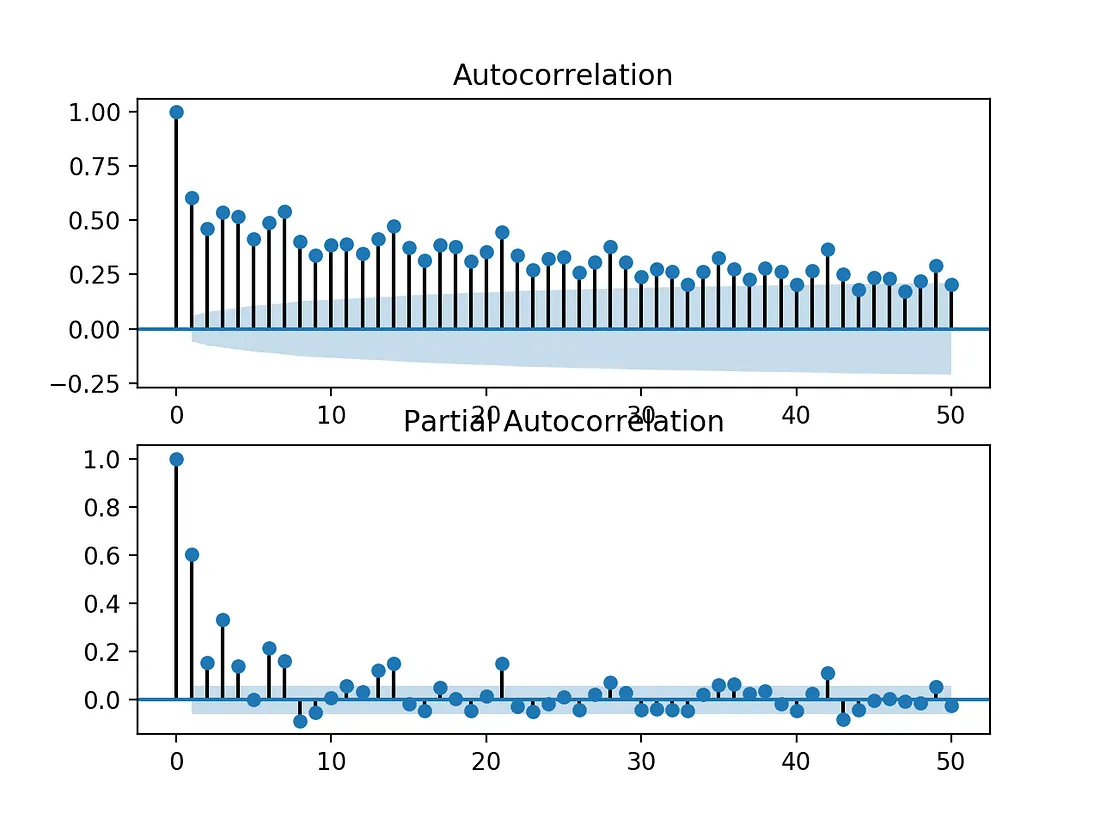

### White Noise
White noise is a purely random series with no predictable pattern.  
It has a constant mean, constant variance, and near-zero autocorrelation at all lags.  
If a series behaves like white noise, no forecasting model can reliably predict future values.

### Stationarity
A series is **stationary** when its statistical properties such as mean, variance, and correlation structure remain constant over time.  
Stationarity is critical because many forecasting models (e.g., ARIMA) assume the underlying data does not drift or change in variability.

#### Signs of Non-Stationarity
- Upward or downward **trend** in the time plot.
- Changing **variance** (values spread wider or narrower over time).
- Slowly decaying autocorrelations in the ACF plot.

#### How to Check Stationarity
1. **Visual inspection** – Plot the series to spot trends or changing spread.  
2. **Rolling statistics** – Compare rolling mean and variance; they should remain roughly constant.  
3. **Statistical tests**:
   - **Augmented Dickey–Fuller (ADF)**:
     - Null hypothesis: the series is non-stationary.
     - p-value < 0.05 → reject the null → series is likely stationary.
   - **KPSS test** ((Kwiatkowski–Phillips–Schmidt–Shin))
     - Null hypothesis: the series is stationary.
     - p-value < 0.05 → reject the null → series is likely non-stationary.

#### Making a Series Stationary
- **Differencing**: Subtract the previous value to remove trend.  
- **Transformations**: Apply log, square root, or Box–Cox to stabilize variance.  
- **Seasonal differencing**: Remove repeating seasonal effects.

### Why These Concepts Matter
Understanding lags, autocorrelation, ACF, PACF, and stationarity enables you to:
- Detect meaningful patterns before modeling.
- Choose the right lag order for ARIMA or similar models.
- Apply transformations to meet model assumptions and improve forecast accuracy.


## Time Series Models

Time series models describe how current values relate to past observations or past forecast errors.  
They help identify patterns and make forecasts. The most common classical models are **AR**, **MA**, **ARMA**, and **ARIMA**.

### 1. Autoregressive (AR) Model
- Predicts future values based on linear combinations of `past values` of the same time series.
- **Order (p)**:  
  - *p* = the number of **past observations (lags)** included in the model.  
  - Example: AR(2) means today’s value depends on **yesterday (lag 1)** and **the day before (lag 2)**.

### 2. Moving Average (MA) Model
- The current value depends on **past forecast errors (shocks)**, not past observations.
- **Order (q)**:
- *q* = the number of **past errors (lagged residuals)** used to predict the current value.
- Example: MA(1) means today’s value depends on **yesterday’s forecast error**.

### 3. ARMA Model
- Combines **AR(p)** and **MA(q)** to model both:
- Dependence on **past values** (AR part),
- Dependence on **past errors** (MA part).
- **Requirement**: The data must be **stationary** (constant mean and variance).
- **Example**: Daily stock returns that show short-term dependence and random shocks → ARMA(1,1).

### 4. ARIMA Model
- Extends ARMA to handle **non-stationary data** by differencing.
- **Parameters (p, d, q)**:
- **p**: AR order (number of past observations to include).
- **d**: Differencing order (number of times to subtract consecutive observations to remove trend or make the series stationary).
- **q**: MA order (number of past forecast errors to include).

- **How to Choose Parameters**:
1. **d** (Differencing):
   - Check stationarity using plots or the **ADF test**.
   - Apply differencing until mean/variance are stable (avoid over-differencing).
2. **p** (AR order):
   - From the **PACF plot**, look for the lag where PACF sharply cuts off.
3. **q** (MA order):
   - From the **ACF plot**, look for the lag where ACF sharply cuts off.

- **Example**:
- Monthly sales show an upward trend.

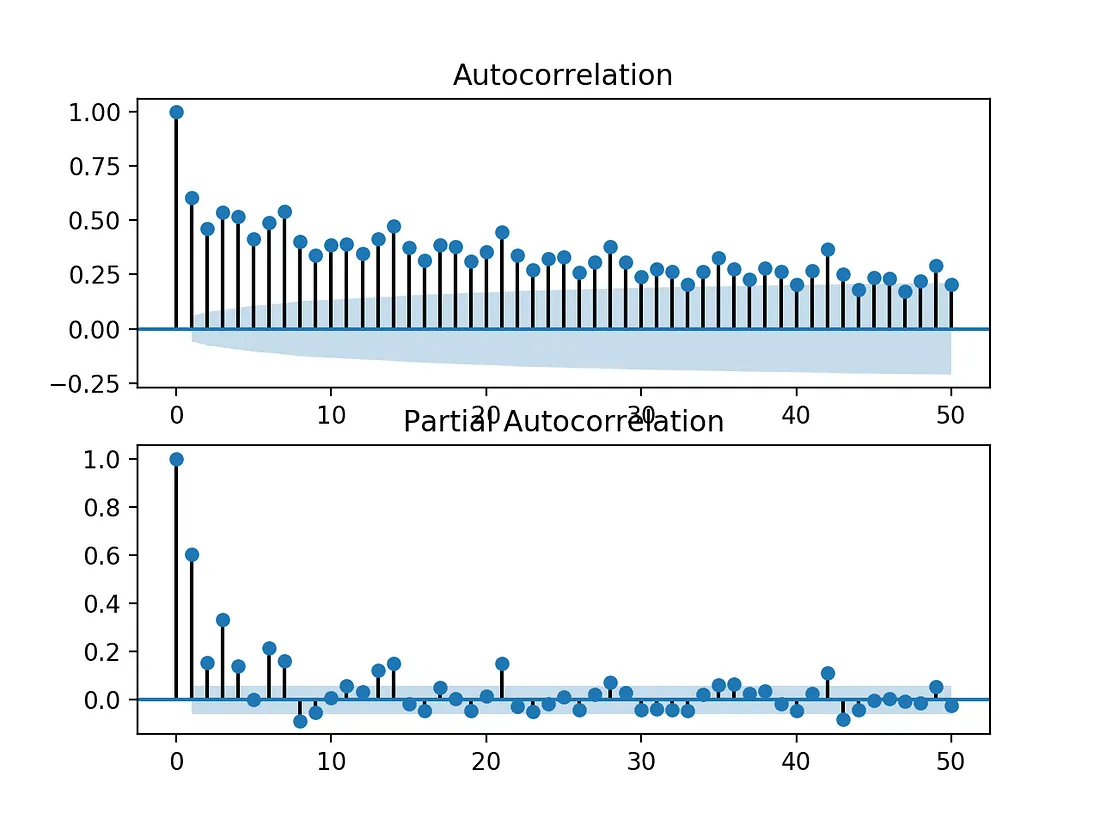

### Choosing ARIMA Parameters from ACF/PACF

From the given plots:

#### ACF (Top Plot)
- Shows correlation with past values.
- **Pattern**: Slow, gradual decay (no sharp cutoff).
- **Meaning**: Indicates an **AR process** rather than a pure MA process.
- **q (MA order)**: Likely **0** or very small.

#### PACF (Bottom Plot)
- Shows direct correlation with lags after removing intermediate effects.
- **Pattern**: Significant spikes up to **lag 2**, then drops within the confidence bands.
- **Meaning**: Suggests **AR order p ≈ 2**.

#### Differencing (d)
- If the original series had trend (non-stationary), first differencing was probably applied.
- **d ≈ 1** is typical to achieve stationarity.

#### Suggested Model
- **ARIMA(2,1,0)**
  - **p = 2**: Two past observations used.
  - **d = 1**: First differencing for stationarity.
  - **q = 0**: No significant MA component.

*Next Step*: Fit ARIMA(2,1,0) and check residuals. If autocorrelation remains, try small adjustments such as ARIMA(2,1,1).

### 5. Seasonal ARIMA (SARIMA)
- Extends ARIMA to handle **seasonal** patterns.
- **Parameters**: (p, d, q) × (P, D, Q, s)
- P, D, Q = seasonal AR, differencing, and MA terms.
- s = length of the seasonal cycle (e.g., 12 for monthly data with yearly seasonality).
- **Example**: Forecasting monthly airline passengers with yearly peaks.


### Time Series Implementation

#### Importing the libraries

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as sts
import seaborn as sns
sns.set_style('darkgrid')

#### Loading the data

In [171]:
raw_data = pd.read_csv("Index2018.csv")
raw_data.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


In [172]:
df_copy = raw_data.copy()

#### Examining the data

In [134]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


- The series represents daily closing prices of four major stock market indices on different dates 
- We usually use `Date` as the index column for time series data
- **S&P 500 (SPX)** – Represents the performance of **500 large U.S. companies**.
- **DAX** – The German stock market index, tracking the **30 largest companies** on the Frankfurt Stock Exchange.
- **FTSE 100** – Measures the performance of the **100 largest UK companies** listed on the London Stock Exchange.
- **Nikkei 225** – Tracks **225 leading Japanese companies** on the Tokyo Stock Exchange.


In [135]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
spx,6269.0,1288.127542,487.586473,438.92,990.671905,1233.42,1459.987747,2872.867839
dax,6269.0,6080.063363,2754.361032,1911.70,4069.350000,5773.34,7443.070000,13559.600000
ftse,6269.0,5422.713545,1145.572428,2876.60,4486.100000,5662.43,6304.250000,7778.637689
nikkei,6269.0,14597.055700,4043.122953,7054.98,10709.290000,15028.17,17860.470000,24124.150000


In [32]:
df_copy.isnull().sum()  

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Plotting the data

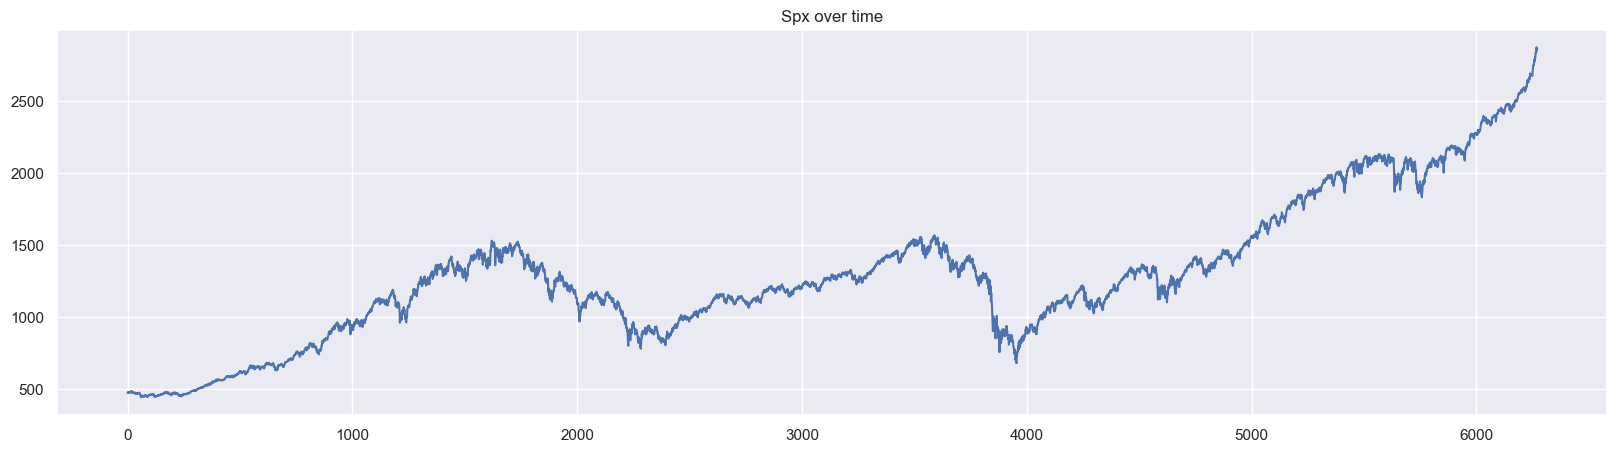

In [124]:
df_copy.spx.plot(title="Spx over time", figsize=(20, 5))
plt.show()

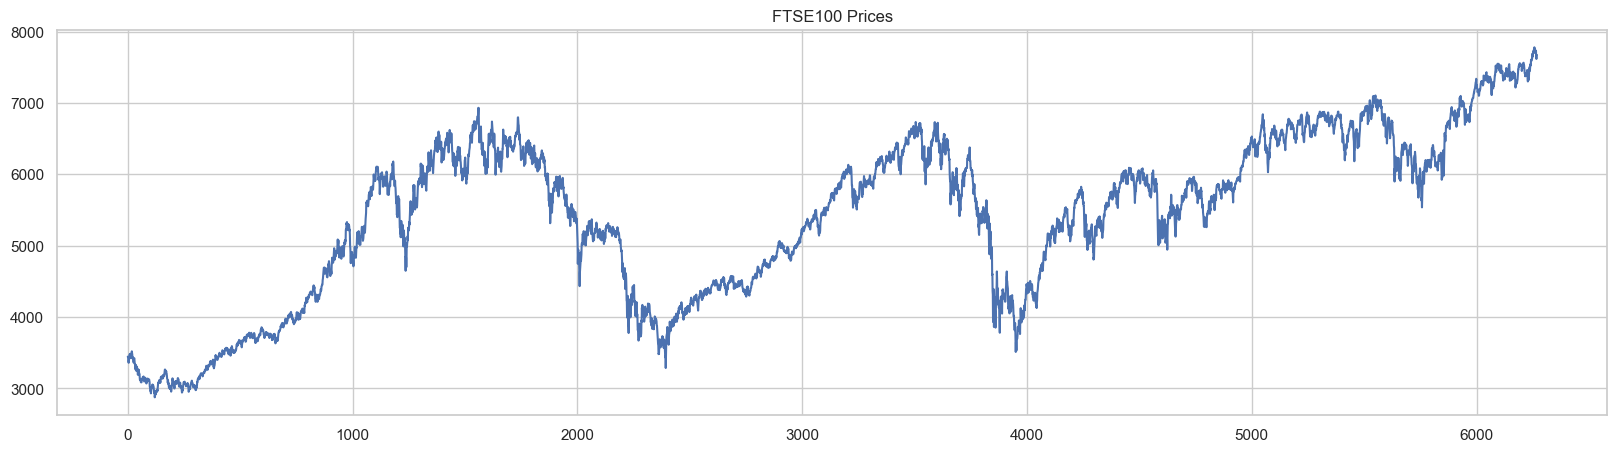

In [34]:
df_copy.ftse.plot(title="FTSE100 Prices", figsize=(20, 5))
plt.show()

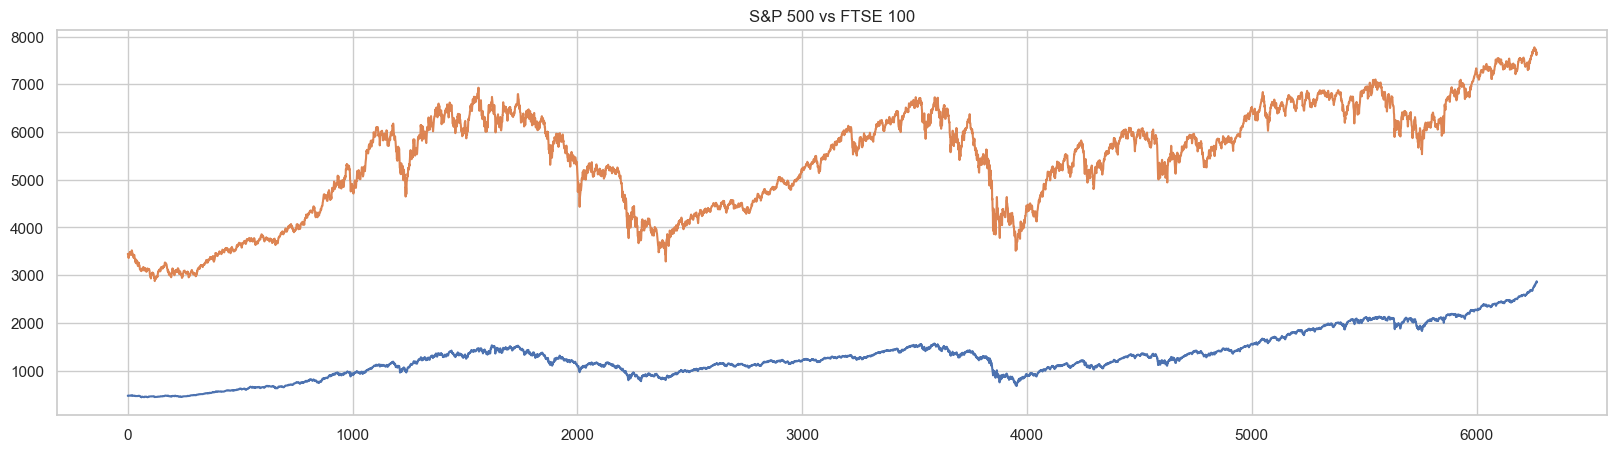

In [35]:
df_copy.spx.plot(figsize=(20,5), title="S&P 500 Prices")
df_copy.ftse.plot(figsize=(20,5), title="FTSE 100 Prices")
plt.title("S&P 500 vs FTSE 100")
plt.show()

- `S & P` looks flat as compared to `FTSE` which would suggest that it is much stable, however this is misleading.
- The graph of `S&P` looks more compact because of the magnitude with because of the magnitude with which values 
`FTSE` and `S&P` change. 

### Converting a dataframe into a time series

- We start by transforming the date column into a date type

#### Length of the time period

In [136]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    6269 non-null   object 
 1   spx     6269 non-null   float64
 2   dax     6269 non-null   float64
 3   ftse    6269 non-null   float64
 4   nikkei  6269 non-null   float64
dtypes: float64(4), object(1)
memory usage: 245.0+ KB


In [37]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
spx,6269.0,1288.127542,487.586473,438.92,990.671905,1233.42,1459.987747,2872.867839
dax,6269.0,6080.063363,2754.361032,1911.70,4069.350000,5773.34,7443.070000,13559.600000
ftse,6269.0,5422.713545,1145.572428,2876.60,4486.100000,5662.43,6304.250000,7778.637689
nikkei,6269.0,14597.055700,4043.122953,7054.98,10709.290000,15028.17,17860.470000,24124.150000


- Since the `date` column is not numeric, python does not include it. 

In [137]:
df_copy.date.describe()

count           6269
unique          6269
top       29/01/2018
freq               1
Name: date, dtype: object

- The top date is misleading as it doesn't hold the highest value or the date with the highest frequency instead it is completely `arbitrary`.
- In python, all the values in the date column are 1s, because they hold some values different from 0, therefore any single date holds a top values. This is why the method selects randomly which one to display.
- We need to fix this so as to analyze consecutive chunks of data and refer to the values assigned to a specific date.
- To do so, we must convert the dates into a `datetime` type.

#### From text to date

In [173]:
df_copy.date = pd.to_datetime(df_copy.date, dayfirst=True)

- Python assumes we are plugging in a string in a `mm/dd/yy` format. Yet our data is saved in the format `dd/mm/yy`

In [139]:
df_copy.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [174]:
df_copy.date.describe()

count                             6269
mean     2006-01-14 19:36:59.492742144
min                1994-01-07 00:00:00
25%                2000-01-11 00:00:00
50%                2006-01-12 00:00:00
75%                2012-01-19 00:00:00
max                2018-01-29 00:00:00
Name: date, dtype: object

In [175]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6269 entries, 0 to 6268
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    6269 non-null   datetime64[ns]
 1   spx     6269 non-null   float64       
 2   dax     6269 non-null   float64       
 3   ftse    6269 non-null   float64       
 4   nikkei  6269 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 245.0 KB


#### Setting the index

In [176]:
df_copy.set_index("date", inplace=True)

In [142]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


In [177]:
df_copy.date.describe()

AttributeError: 'DataFrame' object has no attribute 'date'

- The index values are fixed and we cannot change the values

#### Setting the frequency

- We will use the `asfreq` method
- The values this argument can take are specific letters of the alphabet
    - `h` - hourly
    - `w` - weekly
    - `d` - daily
    - `m` - monthly
- note that the data measured once a year s most often referred to as annual rather than yearly so the parameter value we use is `a` instead of y.

In [178]:
df_copy = df_copy.asfreq("d") 

In [179]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25


- We now see two new periods for January 8th and 9th which have missing values and that is because these dates were not included on the original set

- Another peculiarity of our data is that it represents the closing prices of financial indices , these prices can only be recorded during working days so we're not interested in any weekends or holidays
- If we do a quick check we find that the two periods generated by the method are indeed saturday and sunday so we better avoid adding such irrelevant time periods into our data set.
- Fortunately the as freak parameter also accepts the value b which states the data was only recorded on business days

In [180]:
df_copy = df_copy.asfreq("b")  # b = business day frequency

In [181]:
df_copy.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


#### Handling Missing Values

In [148]:
df_copy.isnull()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,False,False,False,False
1994-01-10,False,False,False,False
1994-01-11,False,False,False,False
1994-01-12,False,False,False,False
1994-01-13,False,False,False,False
...,...,...,...,...
2018-01-23,False,False,False,False
2018-01-24,False,False,False,False
2018-01-25,False,False,False,False


In [182]:
df_copy.isnull().sum()  

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

- Setting the frequency to business days must have generated eight dates for which we have no data available
- To amend this we need to fill these missing elements with values
- The easiest way to do it is via the `fillna` method, the fillna method goes through the entire time series and fills out missing values in several different ways
    - `front filling` - assigns the value of the previous period.
    - `backfilling` - assigns empty entries the value for the next period. 
    - a third way we deal with missing data is by assigning the same value to all of the n a time periods.
- Depending on your data you may opt for only one or a combination of methods, usually filling missing values with the mean is a bad approach when it comes to time series because there are underlying time variant patterns in the data. This approach is appropriate only when the data heavily fluctuates around the mean. 

In [183]:
df_copy.spx = df_copy.spx.fillna(method="ffill") 

C:\Users\user\AppData\Local\Temp\ipykernel_13064\4128042150.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.spx = df_copy.spx.fillna(method="ffill")


In [184]:
df_copy.isnull().sum()

spx       0
dax       8
ftse      8
nikkei    8
dtype: int64

In [185]:
df_copy.ftse = df_copy.ftse.fillna(method="bfill") 

C:\Users\user\AppData\Local\Temp\ipykernel_13064\4092063975.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.ftse = df_copy.ftse.fillna(method="bfill")


In [186]:
df_copy.isnull().sum()

spx       0
dax       8
ftse      0
nikkei    8
dtype: int64

In [187]:
df_copy.dax = df_copy.dax.fillna(value=df_copy.dax.mean())

In [188]:
df_copy.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    8
dtype: int64

In [189]:
df_copy.nikkei = df_copy.nikkei.fillna(method="ffill")

C:\Users\user\AppData\Local\Temp\ipykernel_13064\3464139739.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_copy.nikkei = df_copy.nikkei.fillna(method="ffill")


In [190]:
df_copy.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

#### Simplifying the dataset

- In time series analysis we often end up analyzing a single sequence on its own, we will be analyzing how the s&p 500 performs. 
- So we won't be that interested in the other time series we can remove the columns for the `ftse`, `dax` and `nikkei`
- Okay before we remove any data from the set, let's first create a column called `market value`, we will assign this column with the same values as the `spx`
- This column makes things much more convenient it allows us by changing a single line to reuse the entire code to analyze a different time

In [191]:
df_copy['market_value'] = df_copy.spx

In [192]:
df_copy.describe().T    

,count,mean,std,min,25%,50%,75%,max
spx,6277.0,1288.642547,487.868210,438.92,992.715221,1233.761241,1460.250000,2872.867839
dax,6277.0,6080.063363,2752.604984,1911.70,4070.460000,5774.380000,7442.660000,13559.600000
ftse,6277.0,5423.690398,1145.568370,2876.60,4487.880000,5663.300000,6304.630175,7778.637689
nikkei,6277.0,14597.672753,4043.795272,7054.98,10701.130000,15030.510000,17860.470000,24124.150000
market_value,6277.0,1288.642547,487.868210,438.92,992.715221,1233.761241,1460.250000,2872.867839


In [193]:
del df_copy['ftse']

In [194]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
spx,6277.0,1288.642547,487.868210,438.92,992.715221,1233.761241,1460.25,2872.867839
dax,6277.0,6080.063363,2752.604984,1911.70,4070.460000,5774.380000,7442.66,13559.600000
nikkei,6277.0,14597.672753,4043.795272,7054.98,10701.130000,15030.510000,17860.47,24124.150000
market_value,6277.0,1288.642547,487.868210,438.92,992.715221,1233.761241,1460.25,2872.867839


In [195]:
del df_copy['spx'], df_copy['dax'], df_copy['nikkei']

In [196]:
df_copy.describe()

,market_value
count,6277.000000
mean,1288.642547
std,487.868210
min,438.920000
25%,992.715221
50%,1233.761241
75%,1460.250000
max,2872.867839


### Splitting the data

- We will split the data between the training and tesing set
- To split the dat we need to use the `iloc` method. 
- To successfully implement it we must know where the first set finishes and the second one begins. 
- To achieve this we will make use of the `len` function


In [197]:
size = int(len(df_copy )*0.8)

In [198]:
df = df_copy.iloc[:size]

In [199]:
df_test = df_copy.iloc[size:]

In [200]:
df.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [201]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


### Working with Time series

- `White noise` is a special type of time series where data doesn't follow a pattern. 
- In order to consider a series as white noise it needs to satisfy the following three conditions, by having a constant `mean` a constant `variance` and `no autocorrelation` in any period.
- `autocorrelation` measures how correlated a series is with past versions of itself. `no autocorrelation` meansthere is no clear relationship between past and present values of a time series.
- Thus white noise is a sequence of random data where every value has a time period associated with it. 

#### Generating White Noise Data

- In financial modelling it is important to distinguish white noise data from regular time series data.
- We can easily tell the two apart by comparing their graphs, to demonstrate we can generate white noise data and plot its values then we can try plotting the graph of the S&P closing prices and compare the two.
- To achieve this we can use the help of the `random normal` method which is part of the numpy package this will create an array of random values from a normal distribution 
- If we want this sequence to be comparable to the S&P we should set its mean and standard deviation to that of the actual set 
- The location argument of the method called `LOC` takes numbers for the average point of the distribution therefore we set LOC equal to `DF market value mean` similarly the scale parameter indicates how wide the distribution is so we set it equal to `DF market value STD` 
- Before calling the method we define how many values we want to generate. 

In [202]:
wn = np.random.normal(
    loc = df['market_value'].mean(),
    scale = df['market_value'].std(),
    size = len(df)
)

In [203]:
df['wn'] = wn

C:\Users\user\AppData\Local\Temp\ipykernel_13064\672873062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['wn'] = wn


In [204]:
df.describe()

,market_value,wn
count,5021.000000,5021.000000
mean,1091.651926,1095.117969
std,292.559287,289.794746
min,438.920000,-119.437833
25%,914.620000,899.321509
50%,1144.650000,1099.341956
75%,1316.280729,1287.942062
max,1570.252238,2314.353781


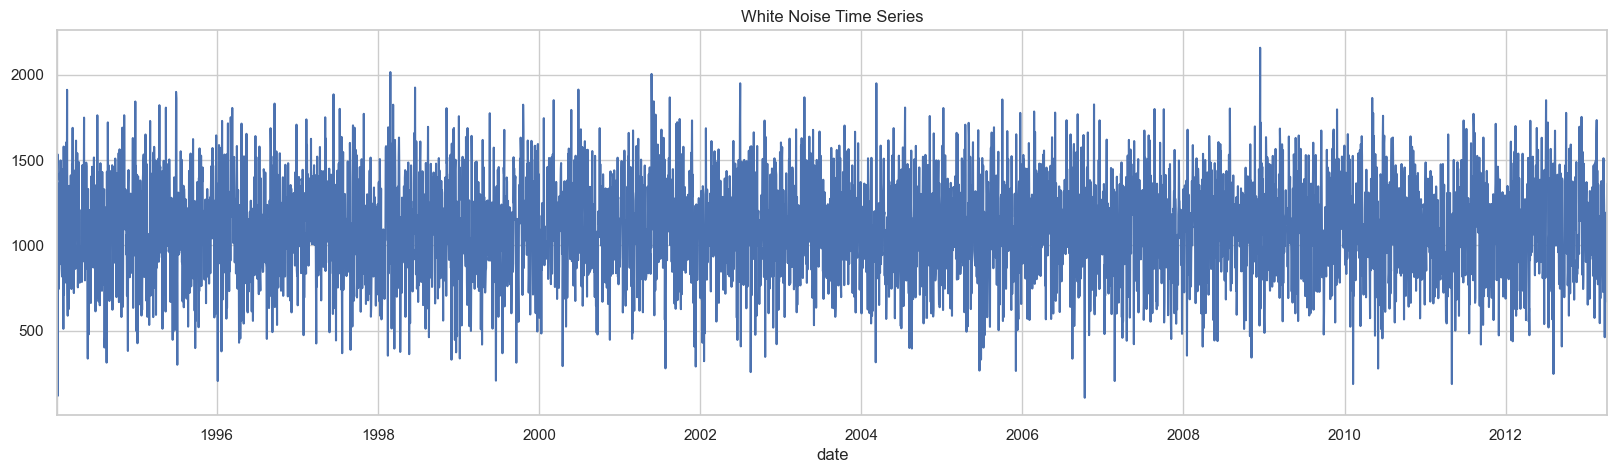

In [87]:
df.wn.plot(figsize=(20,5))
plt.title("White Noise Time Series")
plt.show()

- If we take a look at the elongated figure we will clearly see how many of the values are within some proximity of
the mean of S&P prices

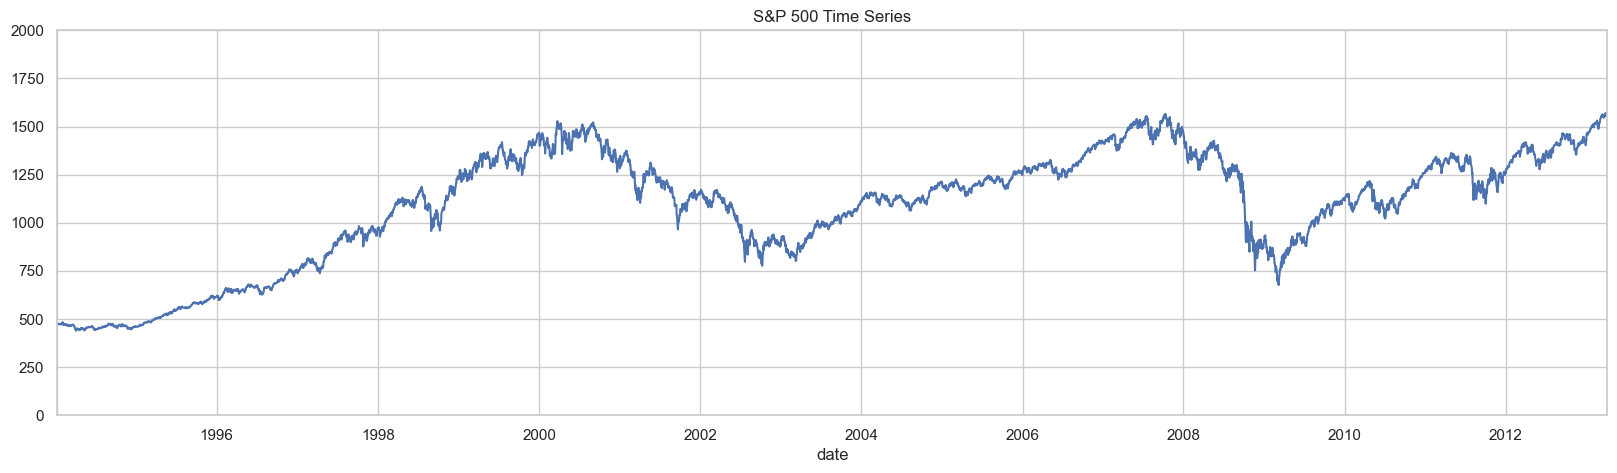

In [91]:
df.market_value.plot(figsize=(20,5))
plt.title("S&P 500 Time Series")
plt.ylim(0, 2000)
plt.show()

### Stationarity

- We will use the `Augmented dickey-fuller test` or ADF test for short.
- The null of the dickey-fuller test assumes `non-stationarity`, 

In [95]:
sts.adfuller(df.market_value)

(np.float64(-1.7369847452352436),
 np.float64(0.4121645696770623),
 18,
 5002,
 {'1%': np.float64(-3.431658008603046),
  '5%': np.float64(-2.862117998412982),
  '10%': np.float64(-2.567077669247375)},
 np.float64(39904.880607487445))

- From running the test as we mentioned we can compare it to certain critical values to determine whether we have
significant proof of stationarity, conveniently enough Python also provides us with the `1`, `5` and `10` percent critical values from the Dickey fuller table.
- You can notice that the T statistic is greater than each of the critical values thus for all of these levels of
significance we do not find sufficient evidence of stationarity in the data set.
- The second line of the results expresses the `p` value associated with the `t-statistic`,the p value equals `0.41`, this suggests there is roughly a 40% chance of not rejecting the null so we can't confirm the data is stationary.

In [96]:
sts.adfuller(df.wn)

(np.float64(-34.02603056441793),
 0.0,
 3,
 5017,
 {'1%': np.float64(-3.431654095870046),
  '5%': np.float64(-2.8621162697870046),
  '10%': np.float64(-2.5670767490325597)},
 np.float64(70689.61064896948))

- We know that `white noise` is a stationary process so we expect to get a very low `p-value` additionally since there is no autocorrelation in white noise there should be no lags involved.
- from the results we see a p-value close to zero and no lags being part of the regression.

#### Seasonality

There are several ways of testing for seasonality, one approach is to `decompose` the sequence where we split up the time series into three effects:
- Trend - represents the pattern consistent throughout the data
- Seasonal - expresses all cyclical effects due to seasonality
- Residual - the error of prediction or the difference between the actual data and the model we fit 

- The simplest type of decomposition is called naive with `naive decomposition` where we expect a linear relationship between the three parts and the observed time series. 
- The two main approaches to naive decomposition are:
    - `additive`- assumes that for any time period the `observed value` = `trend` + `seasonal` + `residual`
    - `multiplicative` - assumes the original series is `observed value` = `trend` * `seasonal` * `residual`


In [97]:
from statsmodels.tsa.seasonal import seasonal_decompose

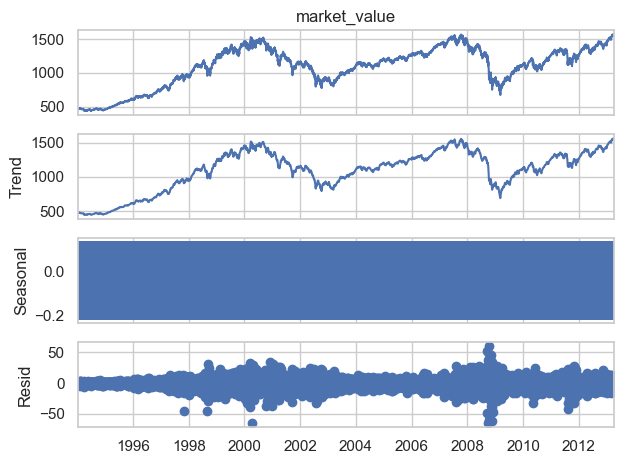

In [101]:
s_dec_additive = seasonal_decompose(df.market_value, model='additive')
s_dec_additive.plot()
plt.show()

- the `trend` closely resembles the `observed series`, that's because the decomposition function uses the previous period values as a trend setter.
- the trend part of the decomposition explains most of the variability of the data.
- the `seasonal plot` looks like a rectangle, this happens when the values are constantly oscillating back and forth and the figure size is too small.
- the `residuals` are the errors of our model estimates, essentially they are the difference between true values and predictions for any period, as you can see the residuals vary greatly around 2008 this can be explained by the instability caused by the dot-com and housing prices bubbles. 

- Overal, the results of the `additive` decomposition suggest no seasonality in the data.

#### Autocorrelation Function



In [103]:
import statsmodels.graphics.tsaplots as sgt

- we set the `zero argument` equal to false, this argument indicates whether we include current period values in the graph.
- for correlation functions this is unnecessary because the correlation between a value and itself will always be 1.
- this will lead to always having the first bar of the graph equal to 1 which makes the plot more difficult to comprehend correctly.

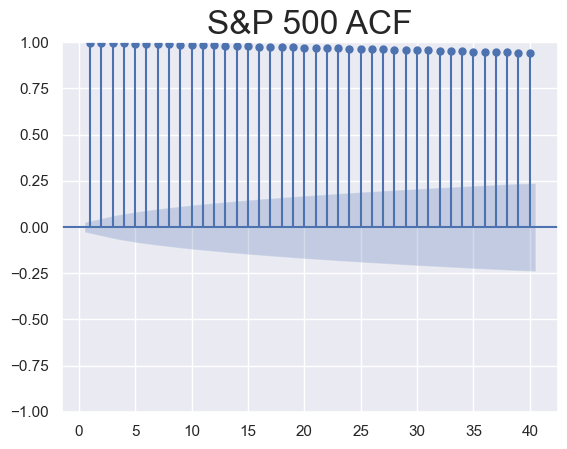

In [111]:
sgt.plot_acf(df.market_value, lags=40, zero=False)
plt.title("S&P 500 ACF", size=24)    
plt.show()

- the first line indicates auto correlation one time period ago the second line represents the coefficient value for two periods ago and so on.
- the blue area around the x-axis represents significance, the values situated outside are significantly different from zero which suggests the existence of autocorrelation for that specific lag.

#### Partial Auto Correlation (PACF)

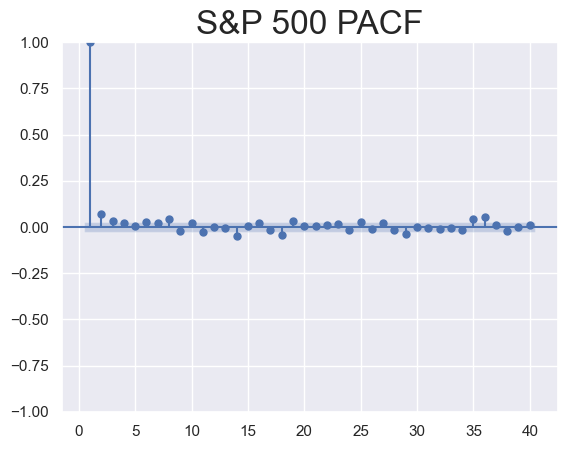

In [112]:
sgt.plot_pacf(df.market_value, lags=40, zero=False, method='ols')
plt.title("S&P 500 PACF", size=24)
plt.show()

- some of the values like the 9th lag are negative this means that higher values 9 periods ago result in lower values today
- also notice how most values after the third lag are within the blue area this means they aren't significantly different from zero so the numeric values attached to them are not important since we can assume they are all essentially zero being positive or negative is somewhat random without any lasting effects 

### Choosing the correct model

- When conducting time-series analysis using supervised machine learning we need to know how to select the most appropriate model
- We usually start with a simple model and expand it as long as it follows several conditions.
- The new coefficients for the more complex model need to be significantly different from zero.
- If that does not hold true, the estimators for these parameters are essentially zero, therefore they don't help us estimate future values.
- This means they hold no predictive powers so we must omit them and revert back to the simpler models.

- We also want our model to be `parsimonious` or in other words as simple as possible generally we prefer using a simpler model to a more complicated one unless the latter provides significantly better predictions.
- To determine whether the predictions are significantly better we introduce a statistical test called the
`log likelihood ratio test`
- The `LLR test` can only be applied to models with different degrees of freedom, thus when comparing several models with the same total number of required lags we need to compare the `information criteria` of each one
- The lower the coefficient, the less data the model requires to make accurate predictions.
- The two most prominent measurements of the kind are:
    - `AIC` 
    - `BIC`
- Since we prefer simplicity, we opt for the model with lower `AIC` and `BIC`coefficients.
- if our model fits well, there should be no trend we have failed to account for therefore the residuals for the model should resemble white noise so we can conclude there is no other pattern we can account for without overtraining our model.

#### The Autoregressive Integrated Moving Average (ARIMA)(1,1,1)

In [113]:
from statsmodels.tsa.arima.model import ARIMA

In [205]:
model_ar_1_1_1_ma_1 = ARIMA(df.market_value, order=(1,1,1))
results_ar_1_1_1_ma_1 = model_ar_1_1_1_ma_1.fit()
results_ar_1_1_1_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -20072.331
Date:                Tue, 23 Sep 2025   AIC                          40150.663
Time:                        14:47:13   BIC                          40170.226
Sample:                    01-07-1994   HQIC                         40157.518
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6011      0.063      9.533      0.000       0.478       0.725
ma.L1         -0.6693      0.057    -11.723      0.000      -0.781      -0.557
sigma2       174.0008      1.764     98.631      0.000     170.543     177.458
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):              7333.43
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               2.27   Skew:                            -0.44
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [206]:
# Forecast the same number of steps as the test set
n_steps = len(df_test)
forecast_obj = results_ar_1_1_1_ma_1.get_forecast(steps=n_steps)

# Extract predicted mean and confidence intervals
y_pred = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

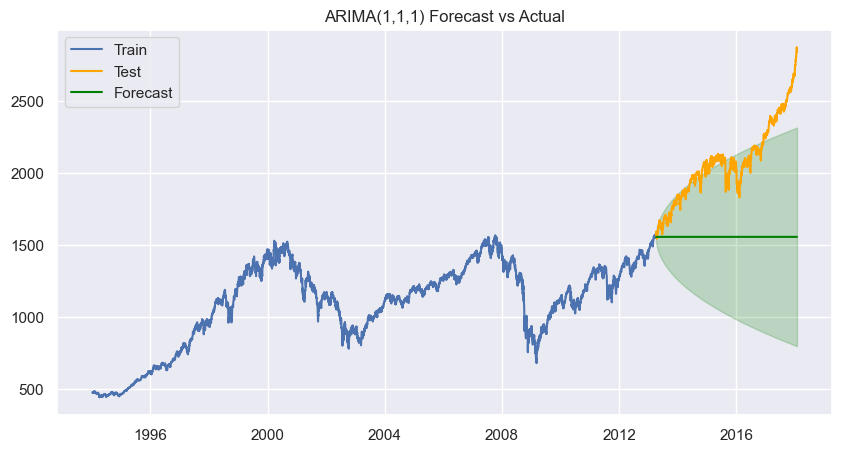

In [207]:
plt.figure(figsize=(10,5))
plt.plot(df.index, df.market_value, label='Train')
plt.plot(df_test.index, df_test.market_value, label='Test', color='orange')
plt.plot(y_pred.index, y_pred, label='Forecast', color='green')
plt.fill_between(conf_int.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='green', alpha=0.2)
plt.legend()
plt.title('ARIMA(1,1,1) Forecast vs Actual')
plt.show()


### Model Evaluation

In [208]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(df_test.market_value, y_pred)
rmse = np.sqrt(mean_squared_error(df_test.market_value, y_pred))

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

MAE : 521.53
RMSE: 586.44


In [211]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(df['market_value'],
                       order=(1, 1, 1),           # non-seasonal (p,d,q)
                       seasonal_order=(1, 1, 1, 12),  # seasonal (P,D,Q,s) - s=12 for monthly data
                       enforce_stationarity=False,
                       enforce_invertibility=False)

results_sarima = model_sarima.fit()
print(results_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                       market_value   No. Observations:                 5021
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -20008.692
Date:                            Tue, 23 Sep 2025   AIC                          40027.384
Time:                                    14:55:39   BIC                          40059.964
Sample:                                01-07-1994   HQIC                         40038.804
                                     - 04-05-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5994      0.064      9.357      0.000       0.474       0.725
ma.L1         -0.6685      0.058   

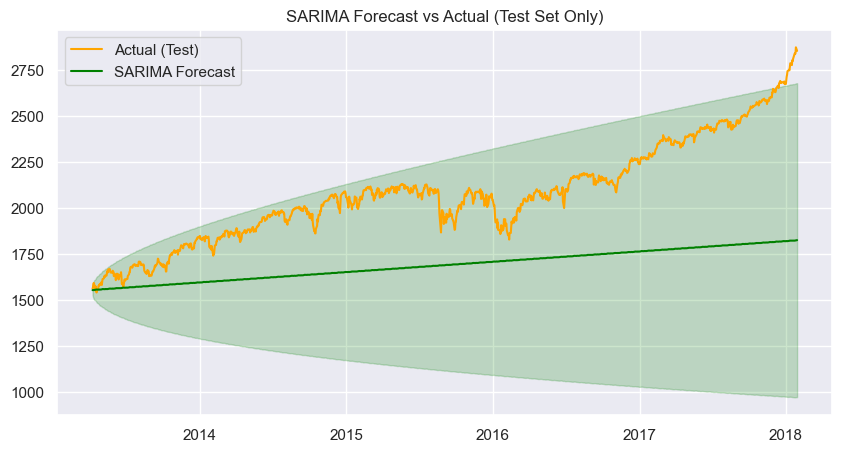

In [216]:
# Forecast the length of the test set
n_steps = len(df_test)
forecast_obj = results_sarima.get_forecast(steps=n_steps)

# Predicted values and confidence intervals
y_pred = forecast_obj.predicted_mean
conf_int = forecast_obj.conf_int()

# Plot the test set vs forecast
plt.figure(figsize=(10,5))
plt.plot(df_test.index, df_test['market_value'], label='Actual (Test)', color='orange')
plt.plot(df_test.index, y_pred, label='SARIMA Forecast', color='green')
plt.fill_between(df_test.index,
                 conf_int.iloc[:,0],
                 conf_int.iloc[:,1],
                 color='green', alpha=0.2)
plt.title('SARIMA Forecast vs Actual (Test Set Only)')
plt.legend()
plt.show()

In [217]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Actual values
y_true = df_test['market_value']

# Evaluation Metrics
mae  = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100  

print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Absolute Error (MAE): 386.0753
Root Mean Squared Error (RMSE): 433.8766
Mean Absolute Percentage Error (MAPE): 17.71%


### Seasonal Decomposition
Statsmodels provides a seasonal decomposition tool we can use to separate out the different components. This lets us see quickly and visually what each component contributes to the overall behavior.

We apply an `additive` model when it seems that the trend is more linear and the seasonality and trend components seem to be constant over time (e.g. every year we add 10,000 passengers).

A `multiplicative` model is more appropriate when we are increasing (or decreasing) at a non-linear rate (e.g. each year we double the amount of passengers).

For these examples we'll use the International Airline Passengers dataset, which gives monthly totals in thousands from January 1949 to December 1960.

In [218]:
import pandas as pd
import numpy as np
%matplotlib inline

In [220]:
airline = pd.read_csv('airline_passengers.csv',index_col='Month',parse_dates=True)

In [221]:
airline.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [222]:
airline.isnull().sum()

Thousands of Passengers    0
dtype: int64

<Axes: xlabel='Month'>

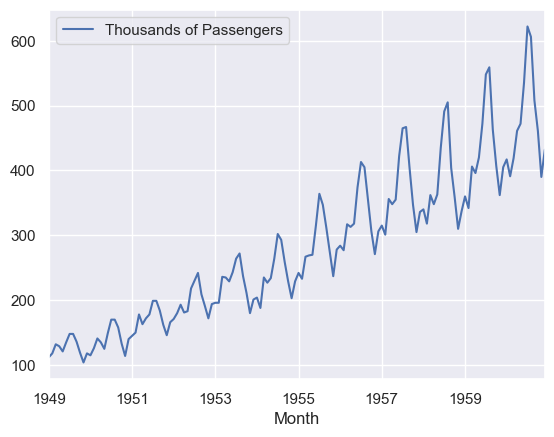

In [224]:
airline.plot()

Based on this chart, it looks like the trend in the earlier days is increasing at a higher rate than just linear (although it is a bit hard to tell from this one plot).

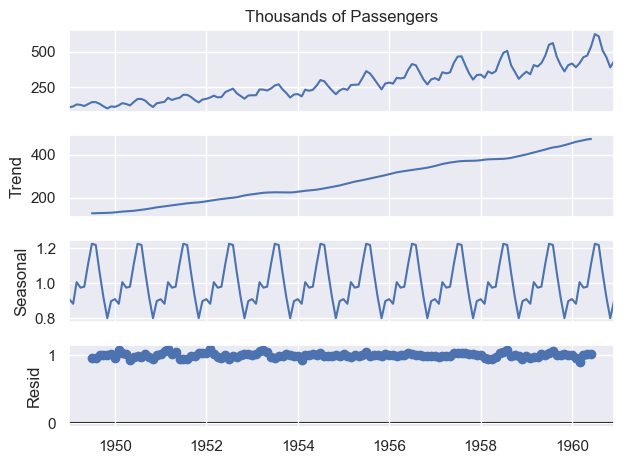

In [227]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(airline['Thousands of Passengers'], model='multiplicative') 
result.plot();

## Smoothing Techniques in Time Series

Smoothing helps reduce **random noise** to reveal the underlying **trend** and **seasonal patterns** in a time series.

### 1. Simple Moving Average (SMA)
The Simple Moving Average (SMA) is a statistical technique used to smooth time series data by calculating the `arithmetic mean` of a fixed number of past observations.

#### How It Works

- A `window` (or period) is chosen (e.g., 6 months, 12 months, 20 days).
- For each time point, SMA takes the average of the values in that window.
- As new data comes in, the window “moves forward”, dropping the oldest value and adding the newest one.
Example with a 3-month window:

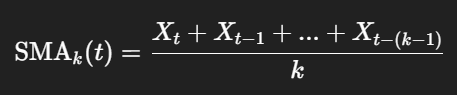

- `k` = window size (6 or 12 months)
- `X_t` = value at time t

Until you have k points, the average is undefined → NaN.

This is repeated for every time step to create a smooth trend line.

In [228]:
airline['6-month-SMA'] = airline['Thousands of Passengers'].rolling(window=6).mean()
airline['12-month-SMA'] = airline['Thousands of Passengers'].rolling(window=12).mean()

In [229]:
airline.head(15)

,Thousands of Passengers,6-month-SMA,12-month-SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


#### Why NaN appears

For the `6-month SMA`, the first 5 months don’t have enough previous months to compute the average:
- Jan 1949 → only 1 month (not enough) → NaN
- Feb 1949 → only 2 months → NaN

<Axes: xlabel='Month'>

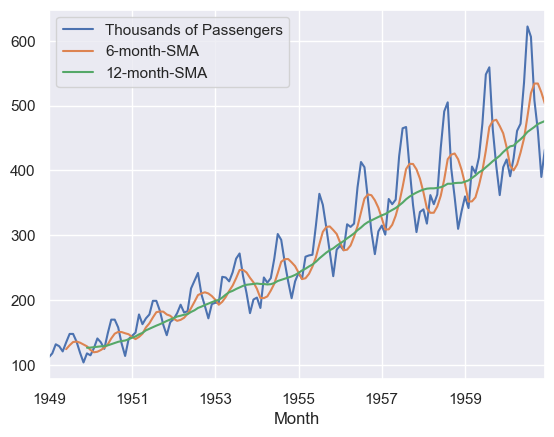

In [230]:
airline.plot()


### 2. Exponential Moving Average (EMA)

We just showed how to calculate the SMA based on some window. However, basic SMA has some weaknesses:

- Smaller windows will lead to more noise, rather than signal
- It will always lag by the size of the window
- It will never reach to full peak or valley of the data due to the averaging.
- Does not really inform you about possible future behavior, all it really does is describe trends in your data.
- Extreme historical values can skew your SMA significantly

To help fix some of these issues, we can use an `EWMA (Exponentially weighted moving average)`.

EWMA will allow us to reduce the lag effect from SMA and it will put more weight on values that occured more recently.

The amount of weight applied to the most recent values will depend on the actual parameters used in the EWMA and the number of periods given a window size.

- Assigns **exponentially decreasing weights** to older observations.
- Gives **more importance to recent data**, making it react faster to changes than SMA.
- Controlled by a smoothing factor `α` (0–1).

The formula for EWMA is:

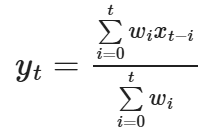

Where `Xt` is the input value, `wi` is the applied weight (Note how it can change from i=0 to `t`), and 
`yt` is the output.

Now the question is, how to we define the weight term?

This depends on the `adjust` parameter you provide to the `.ewm()` method.

When `adjust=True (default)` is used,

In [231]:
airline['EWMA12'] = airline['Thousands of Passengers'].ewm(span=12,adjust=False).mean()

<Axes: xlabel='Month'>

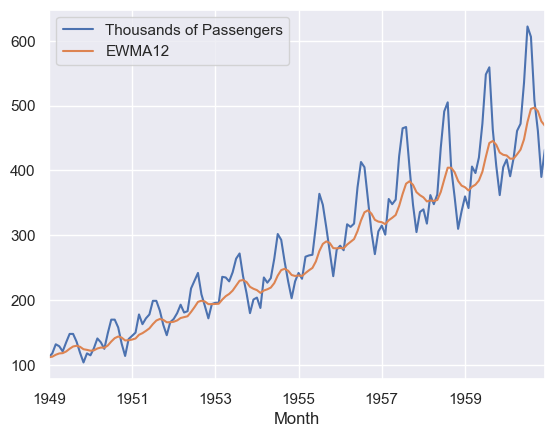

In [232]:
airline[['Thousands of Passengers','EWMA12']].plot()

#### Comparing SMA to EWMA

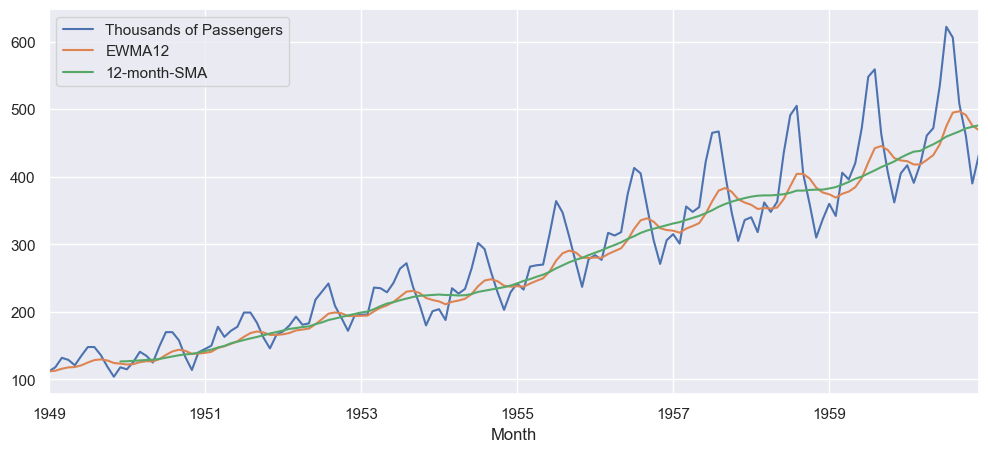

In [239]:
airline[['Thousands of Passengers','EWMA12','12-month-SMA']].plot(figsize=(12,5)).autoscale(axis='x',tight=True)